# Using external code with the import statment

We have already worked with external code using the import function, withouth much explanation:

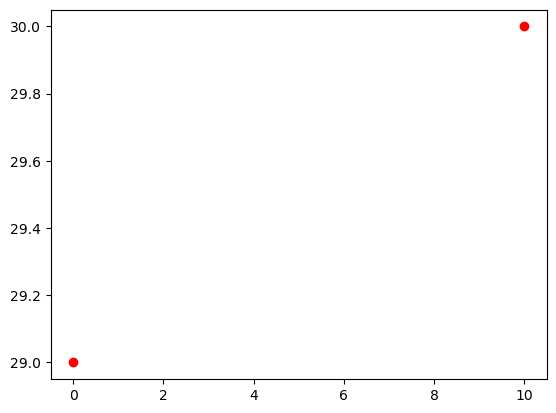

In [1]:
import matplotlib.pyplot as plt

plt.plot([0, 10], [29, 30], 'or')
plt.show()

## Importing packages
So what is going on? Let's use a simpler example:

The `os` package allows you - among other things - to discover and manipulate directories and files.

To use the `os` package, we need to make it available in the python memory - the namespace. We "import" it into the namespace. The general syntax for importing is

`import PACKAGE`

You can then access functions within the package using the dot notation: `PACKAGE.FUNCTION`

In [2]:
import os
os.getcwd()  # print the current working directory

'/Users/janc/Library/CloudStorage/Dropbox/_teaching/neu715 python.2024/neu715/lectures/lecture 2'

## Importing functions
We can also import individual functions into the namespace, using `from PACKAGE import FUNCTION`. We can then use the function without the dot notation. 

In [3]:
from os import getcwd
getcwd()

'/Users/janc/Library/CloudStorage/Dropbox/_teaching/neu715 python.2024/neu715/lectures/lecture 2'

## Importing subpackages and modules 
You can also import _all_ functions from a package into the namespace, using the so-called wildcard character `*` (it's like a joker card that matches any card) `from PACKAGE import *`. But this is discouraged because then you clutter your namespace with all these functions and it is unclear which package a given function came from.

Code is often organized hierarchical, with packages containing subpackages or modules. The precise nomenclature is not important for now. But you access them with dot notation: `PACKAGE.SUBPACKAGE.FUNCTION`. Just as with functions, we can import individual modules from a package: `from PACKAGE import SUBPACKAGE`.

This is how matplotlib is imported: 

1. `matplotlib` is the package
2. `pyplot` is a subpackage (or module) within matplotlib

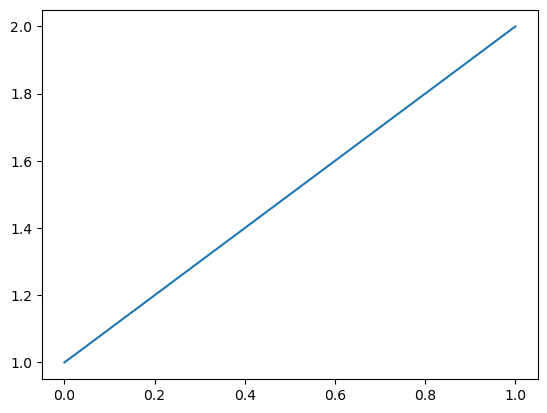

In [4]:
from matplotlib import pyplot

pyplot.plot([1,2])
pyplot.show()

## Aliases
Typing `pyplot` everytime we want to plot something gets tedious quickly. We can define a shorter alias for the pyplot module using the `as` keyword: `from PACKAGE import MODULE as ALIAS` or `import PACKAGE.MODULE as ALIAS`. 

You can then access all functions in the module using the alias:

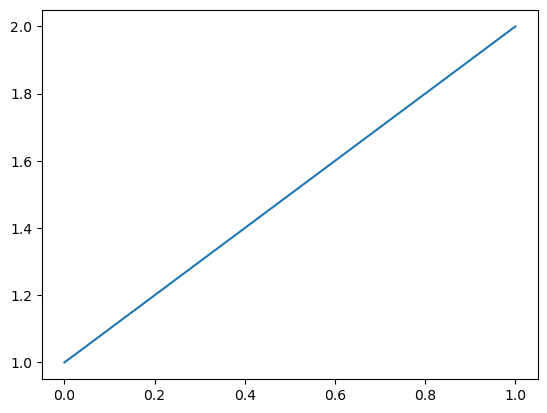

In [5]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt  # equivalent

plt.plot([1,2])
plt.show()

Here are common aliases everyone in the python world uses - if you use these packages, import them the same as everyone else so that others understand your code more easily.

In [9]:
import matplotlib.pyplot as plt  # you used these already
import numpy as np  # next week!
import pandas as pd  # in two weeks!

## Importing your own code
So far, everything happened inside a single notebook.

But what if we want to re-use our own code across notebooks? 

Any python code file (ending in `.py`) is a module that you can import.

So we can save our python functions to a python code file, with the ending `.py` and import it!
Note that the file needs to be in the same directory as the notebook you import it into. There are ways around this but we will not cover them here.

Say we have this function for computing the mean of a list:

In [10]:
def mean_local(data):
    mean_data = sum(data) / len(data)
    return mean_data

x = [1,2,3,4]
mean_local(x)

2.5

To make it available across notebooks, we can save the function to a python code file and import it:

- open a text editor (get a good one that has syntax highlighting etc - I use visual studio code)
- open a new, empty file
- copy the function text to that file (starting from the `def` and ending with the `return` statement)
- rename the function from `mean_local` to `mean`
- add a docstring so it's clear what the function does and what the inputs and outputs are.
- save the python code file in the same folder as the current notebook, under the name: `my_functions.py`. It is important to save it in the same folder - otherwise python will not be able to find the file!!

The file content should be like this:
```python
def mean(data):
    """Computes the mean of all elements in the list `data`.
    
    Args:
        data: List of numbers

    Returns: the mean over all numbers in `data`.

    """
    mean_data = sum(data) / len(data)
    return mean_data
```
We can then import the module using the file name (without the extension `.py`), access the function using the dot notation, and even get help:

In [11]:
import my_functions
my_functions.mean?

Signature: my_functions.mean(data)
Docstring:
Computes the mean of all elements in `data`

Args:
    data: List of numbers

Returns: the mean over all numbers in `data`
File:      ~/Library/CloudStorage/Dropbox/_teaching/neu715 python.2024/neu715/lectures/lecture 2/my_functions.py
Type:      function

In [12]:
x = [1,2,3,4]
my_functions.mean(x)

2.5

In [13]:
import my_functions as m  # we can also use an alias to save typing

x = [1,2,3,4]
m.mean(x)

2.5

__Caution__ Once you've imported a function, any changes to the code in the file will not be reflected immediately in the notebook. This is because when python encounters an import statement, it "checks" whether this package/module has been imported before and will only import it if it has not been imported before. You have to reset the namespace by restarting the notebook kernel and then import the module again to use changed code.